# Задание

Используем набор данных Ames Housing,
который рассматривался на первых лекциях.

Сравниваем цены домов (SalePrice) в двух группах.
Группы определяются по значениям количественных переменных,
то есть по переменным из списка, определенного командой
AH.describe(include=[np.number]).

Для примера используем переменную площадь дома (Gr Liv Area).
Группы определяются условием
значение переменной Gr Liv Areaбольше медианы или
значение переменной Gr Liv Area меньше медианы.

Выбрать гипотезу для проверки.
Либо гипотезу о равенстве математических ожиданий или гипотезу о равенстве медиан.

Обосновать выбор.
Проверить гипотезу.
Проиллюстрировать результат ящиком с усами.

Самостоятельно выбрать две переменные,
то есть сравнение производим ДВАЖДЫ, для двух разных переменных.
В качестве группирующей переменной нельзя использовать переменные
SalePrice и Gr Liv Area.

# Реализация

Загрузим библиотеки

In [ ]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

matplotlib.style.use('ggplot')

%matplotlib inline

In [ ]:
from scipy import stats

Установим уровень значимости = 0.05

In [ ]:
ALPHA_LEVEL = 0.05

Считаем данные

In [ ]:
AH = pd.read_csv('AmesHousing.txt', sep="\t", header = 0, index_col=False)

In [ ]:
AH.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


In [ ]:
#  Размеры таблицы данных
print(AH.shape)

(2930, 82)


In [ ]:
#  Описательные статистики для
#  переменных в количественной шкале
AH.describe(include=[np.number])

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


Посмотрим по описанию смысл переменных. Например можно использовать для сравнения переменную Bedroom AbvGr, Full Bath.

## Сравнение по переменной Bedroom AbvGr

In [ ]:
AH['Bedroom AbvGr'].describe()

count    2930.000000
mean        2.854266
std         0.827731
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: Bedroom AbvGr, dtype: float64

Так как значение второго квартиля равно значению третьего квартиля (и равно 3), то разделим на две группы следующим образом: если значение меньше медианы, то отнесем в первую группу, а если больше или равно, то во вторую группу.

In [ ]:
data_temp = AH[['Bedroom AbvGr', 'SalePrice']]
data_temp.head(10)

,Bedroom AbvGr,SalePrice
0,3,215000
1,2,105000
2,3,172000
3,3,244000
4,3,189900
5,3,195500
6,2,213500
7,2,191500
8,2,236500
9,3,189000


In [ ]:
data_bedroom_1 = data_temp[data_temp['Bedroom AbvGr'] < 3]
data_bedroom_1.head(10)

,Bedroom AbvGr,SalePrice
1,2,105000
6,2,213500
7,2,191500
8,2,236500
13,2,171500
14,1,212000
17,1,394432
18,2,141000
23,2,149000
26,2,126000


In [ ]:
data_bedroom_2 = data_temp[data_temp['Bedroom AbvGr'] >= 3]
data_bedroom_2.head(10)

,Bedroom AbvGr,SalePrice
0,3,215000
2,3,172000
3,3,244000
4,3,189900
5,3,195500
9,3,189000
10,3,175900
11,3,185000
12,3,180400
15,4,538000


Проверим нормальность распределений:

In [ ]:
def two_histograms(x, y):
    """
    Функция, которая построит две гистограммы на одной картинке.
    Дополнительно пунктирными линиями указываются средние значения выборок.
    x: вектор pd.Series,
    y: вектор pd.Series
    """
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

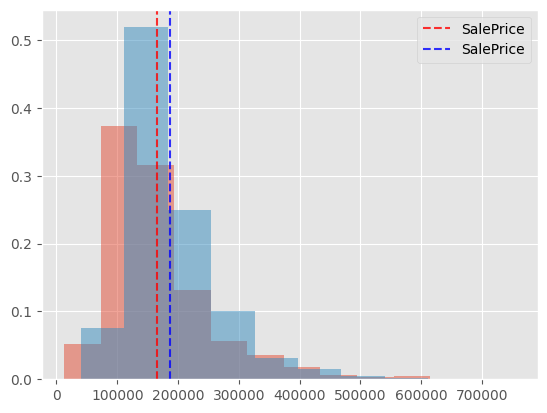

In [ ]:
two_histograms(data_bedroom_1['SalePrice'], data_bedroom_2['SalePrice'])

В целом из гистограммы видно, что это не является нормальными распределениями, так как справа от наиболее часто встречающихся значений более пологий спуск, чем слева.

Проверим с помощью критерия Шапиро-Уилка:

In [ ]:
p_value_1 = stats.shapiro(data_bedroom_1['SalePrice']).pvalue
p_value_2 = stats.shapiro(data_bedroom_2['SalePrice']).pvalue

print('p-value для первой группы: ', p_value_1)
print('p-value для второй группы: ', p_value_2)

print('у первой группы нормальное распределение: ', p_value_1 > ALPHA_LEVEL)
print('у второй группы нормальное распределение: ', p_value_2 > ALPHA_LEVEL)

p-value для первой группы:  4.286968678112358e-27
p-value для второй группы:  9.393696741300057e-39
у первой группы нормальное распределение:  False
у второй группы нормальное распределение:  False


Распределения обоих выборок существенно отличается от нормального распределения, поэтому в качестве гипотезы будем использовать равенство медиан.

В соотвтствии с тем, что требуется проверить гипотезу о равенстве медиану, нужно применить критерий Манна-Уитни

In [ ]:
res = stats.mannwhitneyu(data_bedroom_1['SalePrice'], data_bedroom_2['SalePrice'])
print('p-value:', res[1])

p-value: 1.3685691597195643e-23


Таким образом, гипотеза о равенстве медиан отвергается.

Для того чтобы проиллюстрировать результат, построим ящик с усами:

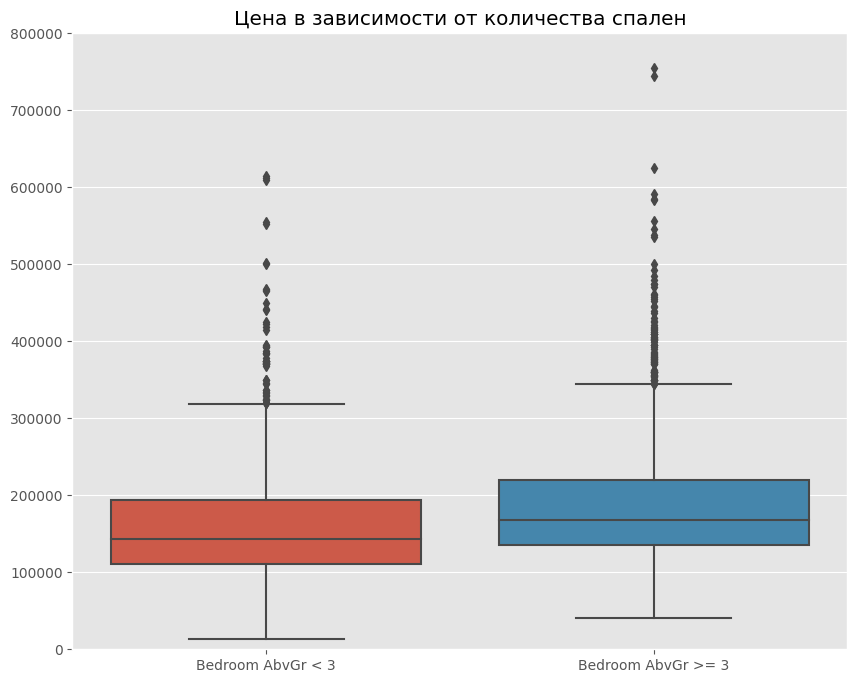

In [ ]:
var = 'Bedroom AbvGr'
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot([data_bedroom_1['SalePrice'], data_bedroom_2['SalePrice']])
plt.xticks([0, 1], [f'Bedroom AbvGr < {3}', f'Bedroom AbvGr >= {3}'])
fig.axis(ymin=0, ymax=800000);

plt.title(u'Цена в зависимости от количества спален')

plt.savefig('boxplot_1.png', dpi=300)

Вывод: действительно, цена зависит от количества спален - в группе, где количество спален меньше - медиана цены меньше, чем в группе, в которой количество спален больше

## Сравнение по переменной Full Bath

In [ ]:
AH['Full Bath'].describe()

count    2930.000000
mean        1.566553
std         0.552941
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: Full Bath, dtype: float64

Так как значение второго квартиля равно значению третьего квартиля (и равно 2), то разделим на две группы следующим образом: если значение меньше медианы, то отнесем в первую группу, а если больше или равно, то во вторую группу.

In [ ]:
data_temp = AH[['Full Bath', 'SalePrice']]
data_temp.head(10)

,Full Bath,SalePrice
0,1,215000
1,1,105000
2,1,172000
3,2,244000
4,2,189900
5,2,195500
6,2,213500
7,2,191500
8,2,236500
9,2,189000


In [ ]:
data_bath_1 = data_temp[data_temp['Full Bath'] < 2]
data_bath_1.head(10)

,Full Bath,SalePrice
0,1,215000
1,1,105000
2,1,172000
13,1,171500
14,1,212000
17,1,394432
18,1,141000
23,1,149000
24,1,149900
25,1,142000


In [ ]:
data_bath_2 = data_temp[data_temp['Full Bath'] >= 2]
data_bath_2.head(10)

,Full Bath,SalePrice
3,2,244000
4,2,189900
5,2,195500
6,2,213500
7,2,191500
8,2,236500
9,2,189000
10,2,175900
11,2,185000
12,2,180400


Проверим нормальность распределений:

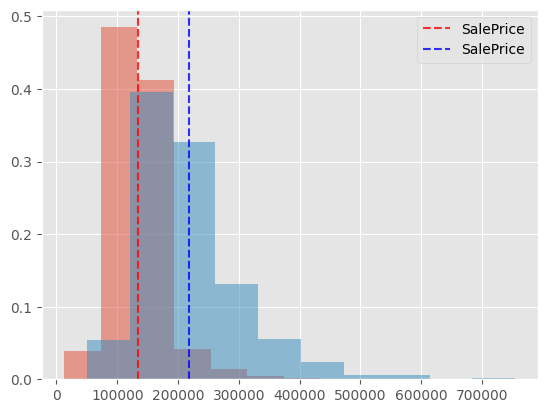

In [ ]:
two_histograms(data_bath_1['SalePrice'], data_bath_2['SalePrice'])

Как и в первом сравнении, гистограммы по аналогичной причине не являются нормальными.

Проверим с помощью критерия Шапиро-Уилка:

In [ ]:
p_value_1 = stats.shapiro(data_bath_1['SalePrice']).pvalue
p_value_2 = stats.shapiro(data_bath_2['SalePrice']).pvalue

print('p-value для первой группы: ', p_value_1)
print('p-value для второй группы: ', p_value_2)

print('у первой группы нормальное распределение: ', p_value_1 > ALPHA_LEVEL)
print('у второй группы нормальное распределение: ', p_value_2 > ALPHA_LEVEL)

p-value для первой группы:  3.451325743368939e-35
p-value для второй группы:  8.427859562485997e-32
у первой группы нормальное распределение:  False
у второй группы нормальное распределение:  False


Распределения обоих выборок существенно отличается от нормального распределения, поэтому в качестве гипотезы будем использовать равенство медиан.

В соотвтствии с тем, что требуется проверить гипотезу о равенстве медиану, нужно применить критерий Манна-Уитни

In [ ]:
res = stats.mannwhitneyu(data_bath_1['SalePrice'], data_bath_2['SalePrice'])
print('p-value:', res[1])

p-value: 5.569194616900242e-255


Таким образом, гипотеза о равенстве медиан отвергается.

Для того чтобы проиллюстрировать результат, построим ящик с усами:

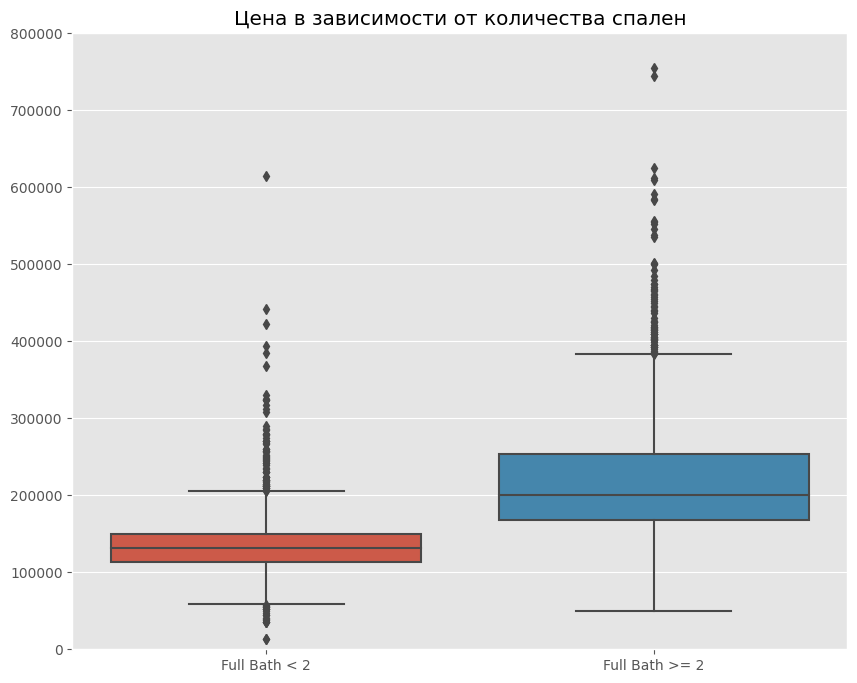

In [ ]:
var = 'Full Bath'
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot([data_bath_1['SalePrice'], data_bath_2['SalePrice']])
plt.xticks([0, 1], [f'Full Bath < {2}', f'Full Bath >= {2}'])
fig.axis(ymin=0, ymax=800000);

plt.title(u'Цена в зависимости от количества спален')

plt.savefig('boxplot_1.png', dpi=300)

Вывод: цены в двух разных группах достаточно сильно различаются, это видно по ящику с усами